# **Python-RandomForestRegressor**


### **1.Import libraries **

In [1]:
!pip install pandas

In [2]:
from sklearn.ensemble import RandomForestRegressor # randomforest regression
from sklearn.metrics import mean_squared_error  # mse
from sklearn.model_selection import train_test_split  # split
import pandas as pd
import numpy as np

#### **Set path, import data; Split training set and test set**

In [5]:
DATA_path = r'C:\Users\treedata1.xlsx'
DATA = pd.read_excel(DATA_path)

x = DATA.iloc[:,:-1]
y = DATA.iloc[:,-1]
x_train, x_validation , y_train, y_validation = train_test_split(x,y,test_size=0.2)

### 2.Randomforest Regression - Training model

Method 1：Manually split the training set and test set

Method 2: Using the OOB

#### **Method 1**

In [14]:
rfr = RandomForestRegressor(
                             n_estimators=200,
                           min_samples_leaf =5,
                               max_features =3,
                             oob_score = False
                             )
rfr.fit(x_train,y_train)#training model
result_y = rfr.predict(x_validation)#testing
print(mean_squared_error(result_y,y_validation)) # mes
print(rfr.score(x_validation,y_validation)) # R2
#print(rfr.oob_score_) # OOB
#pre =  rfr.predict(np.array(Test_set).reshape(1,-1)) #predict
importances = rfr.feature_importances_
print("Importance：", importances)

0.0015177634650722872
0.8344291348504744
Importance： [0.07889107 0.07066938 0.23446318 0.16244881 0.04632355 0.24151271
 0.0390852  0.05342717 0.07317892]


<AxesSubplot:ylabel='Feature'>

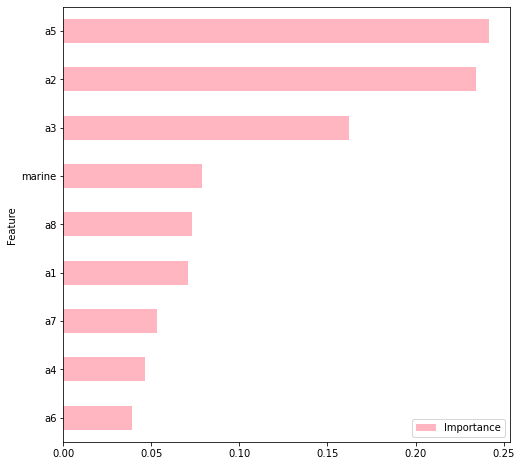

In [15]:
#Visualization
names = x_train.columns
importance_frame = pd.DataFrame({'Importance': list(rfr.feature_importances_), 'Feature': list(names)})
importance_frame.sort_values(by='Importance', inplace=True)
#importance_frame['rela_imp'] = importance_frame['Importance'] / sum(importance_frame['Importance'])
importance_frame.plot(kind='barh', x='Feature', figsize=(8, 8), color='LightPink')


#### *Method 2*

In [20]:
rfr = RandomForestRegressor(
                             n_estimators=200,
                           min_samples_leaf =5,
                               max_features =2,
                               oob_score = True
                             )
rfr.fit(x,y)#training model
result_y = rfr.predict(x)
print(mean_squared_error(result_y,y)) 
print(rfr.oob_score_) # OOB

importances = rfr.feature_importances_
print("Importance：", importances)

0.0012408357369548364
0.8337806175083576
Importance： [0.10903998 0.08972154 0.18943586 0.16188001 0.06464803 0.20203116
 0.04350026 0.05678753 0.08295563]


<AxesSubplot:ylabel='Feature'>

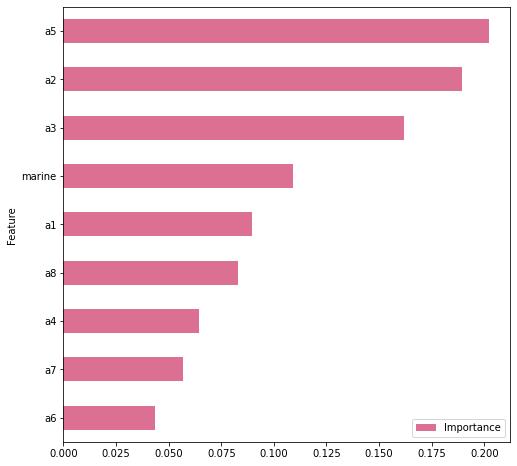

In [21]:
#Visualization
names = x_train.columns
importance_frame = pd.DataFrame({'Importance': list(rfr.feature_importances_), 'Feature': list(names)})
importance_frame.sort_values(by='Importance', inplace=True)
#importance_frame['rela_imp'] = importance_frame['Importance'] / sum(importance_frame['Importance'])
importance_frame.plot(kind='barh', x='Feature', figsize=(8, 8), color='PaleVioletRed')


### 3.Partial Dependence Plots

In [48]:
DATA_path = r'C:\Randomforest-PDP\treedata2.xlsx'
DATA = pd.read_excel(DATA_path)

x = DATA.iloc[:,:-1]
y = DATA.iloc[:,-1]

rfr = RandomForestRegressor(
                             n_estimators=200,
                           min_samples_leaf =5,
                               max_features =2,
                               oob_score = True
                             )
rfr.fit(x,y)#training model
result_y = rfr.predict(x)
print(mean_squared_error(result_y,y)) 
print(rfr.oob_score_) # OOB

importances = rfr.feature_importances_
print("Importance：", importances)

0.0012545203497421255
0.8291304447813805
Importance： [0.04566052 0.04318098 0.0895843  0.08046517 0.03703546 0.08013279
 0.02650919 0.03504155 0.03018778 0.06341699 0.09628948 0.0634057
 0.07194933 0.12943527 0.01872054 0.02477669 0.06420827]



#### DrawInMap3D

In [49]:
from sklearn.inspection import partial_dependence
from matplotlib.pyplot import MultipleLocator

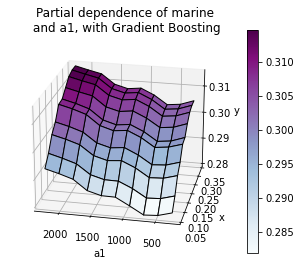

In [51]:
fig = plt.figure()
features = ("a4", "marine")
pdp = partial_dependence(
    rfr, x_train, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

ax.invert_xaxis()# direction of adjustment

# Coordinate distance adjustment
#x_major_locator=MultipleLocator(400) 
#ax.xaxis.set_major_locator(x_major_locator)
#y_major_locator=MultipleLocator(0.1) 
#ax.yaxis.set_major_locator(y_major_locator)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")
ax.set_xlabel("a1")
ax.set_ylabel("x")
ax.set_zlabel("y")
# pretty init view
ax.view_init(elev=22, azim=-78)
plt.colorbar(surf)
plt.suptitle(
    "Partial dependence of marine\n"
    " and a1, with Gradient Boosting"
)
plt.subplots_adjust(top=0.9)
plt.show()